In [19]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (2).csv


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [21]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

print("Shape of dataset:", df.shape)
df.info()
df.head()


Shape of dataset: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [22]:

df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

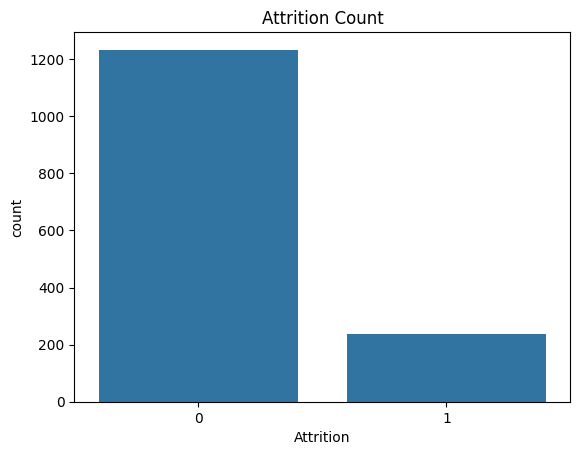

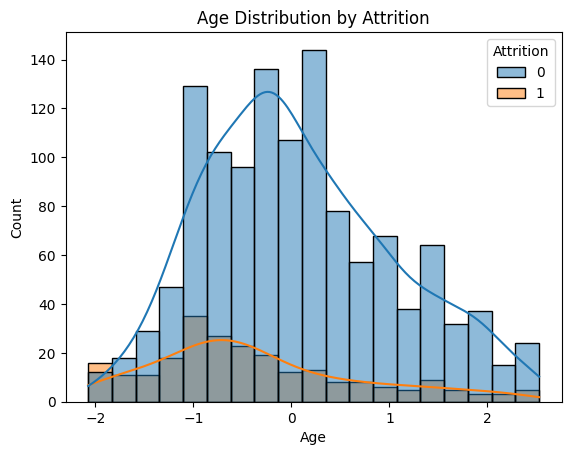

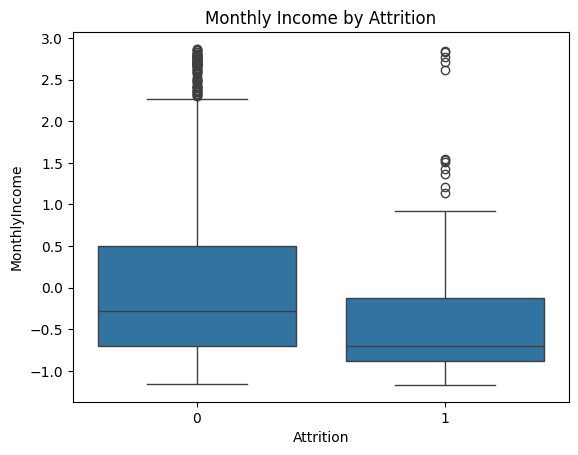

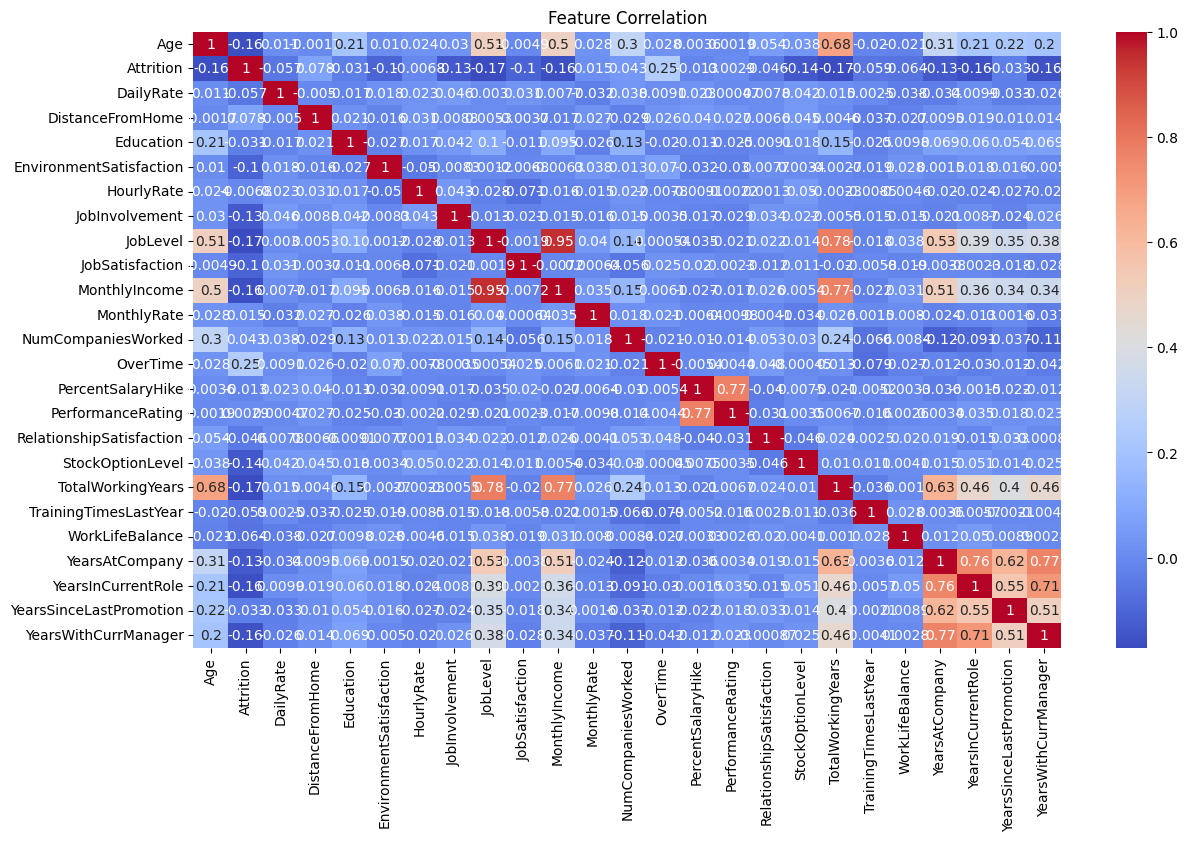

In [36]:

sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()

sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title("Age Distribution by Attrition")
plt.show()

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Attrition")
plt.show()

numeric_df = df.select_dtypes(include=['int64', 'float64'])  # or include=['number'] also works

plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(),
annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [24]:

df = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
num_cols = df.drop('Attrition', axis=1).select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])
df

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0     0.446350          1   0.742527         -1.010909  -0.891688   
1     1.322365          0  -1.297775         -0.147150  -1.868426   
2     0.008343          1   1.414363         -0.887515  -0.891688   
3    -0.429664          0   1.461466         -0.764121   1.061787   
4    -1.086676          0  -0.524295         -0.887515  -1.868426   
...        ...        ...        ...               ...        ...   
1465 -0.101159          0   0.202082          1.703764  -0.891688   
1466  0.227347          0  -0.469754         -0.393938  -1.868426   
1467 -1.086676          0  -1.605183         -0.640727   0.085049   
1468  1.322365          0   0.546677         -0.887515   0.085049   
1469 -0.320163          0  -0.432568         -0.147150   0.085049   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                   -0.660531    1.383138        0.379672 -0.057788   
1                    0.254625   -0.240677       -1.026167 -0.057788   
2                    1.169781    1.284725       -1.026167 -0.961486   
3                    1.169781   -0.486709        0.379672 -0.961486   
4                   -1.575686   -1.274014        0.379672 -0.961486   
...                       ...         ...             ...       ...   
1465                 0.254625   -1.224807        1.785511 -0.057788   
1466                 1.169781   -1.175601       -1.026167  0.845911   
1467                -0.660531    1.038693        1.785511 -0.057788   
1468                 1.169781   -0.142264       -1.026167 -0.057788   
1469                -0.660531    0.792660        1.785511 -0.057788   

      JobSatisfaction  ...  JobRole_Human Resources  \
0            1.153254  ...                    False   
1           -0.660853  ...                    False   
2            0.246200  ...                    False   
3            0.246200  ...                    False   
4           -0.660853  ...                    False   
...               ...  ...                      ...   
1465         1.153254  ...                    False   
1466        -1.567907  ...                    False   
1467        -0.660853  ...                    False   
1468        -0.660853  ...                    False   
1469         0.246200  ...                    False   

      JobRole_Laboratory Technician  JobRole_Manager  \
0                             False            False   
1                             False            False   
2                              True            False   
3                             False            False   
4                              True            False   
...                             ...              ...   
1465                           True            False   
1466                          False            False   
1467                          False            False   
1468                          False            False   
1469                           True            False   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                              False                      False   
1                              False                      False   
2                              False                      False   
3                              False                      False   
4                              False                      False   
...                              ...                        ...   
1465                           False                      False   
1466                           False                      False   
1467                            True                      False   
1468                           False                      False   
1469                           False                      False   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                          False                     True   
1                           True                    False   
2      

In [37]:

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
       "Logistic Regression": LogisticRegression(),
     }

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



=== Logistic Regression ===
Accuracy: 0.8605442176870748
Confusion Matrix:
 [[237  10]
 [ 31  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



In [38]:
print("=== Insights ===")
print("- Employees working overtime, with low income and job satisfaction, are more likely to leave.")
print("- Logistic Regression is interpretable.")
print("- Actionable tips: Reduce overtime, improve work-life balance, review compensation.")


=== Insights ===
- Employees working overtime, with low income and job satisfaction, are more likely to leave.
- Logistic Regression is interpretable.
- Actionable tips: Reduce overtime, improve work-life balance, review compensation.
